In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'UkraineWarDataset/0401_UkraineCombinedTweetsDeduped.csv')
df.head()

C:\Users\upaya\AppData\Local\Temp\ipykernel_29584\3004370439.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'UkraineWarDataset/0401_UkraineCombinedTweetsDeduped.csv')


,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459


# Exploratory Data Analysis (EDA)

In [3]:
df.columns

Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'extractedts'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364875 entries, 0 to 364874
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          364875 non-null  int64 
 1   username        364875 non-null  object
 2   acctdesc        286424 non-null  object
 3   location        212929 non-null  object
 4   following       364875 non-null  int64 
 5   followers       364875 non-null  int64 
 6   totaltweets     364875 non-null  int64 
 7   usercreatedts   364875 non-null  object
 8   tweetid         364875 non-null  int64 
 9   tweetcreatedts  364875 non-null  object
 10  retweetcount    364875 non-null  int64 
 11  text            364875 non-null  object
 12  hashtags        364875 non-null  object
 13  language        364875 non-null  object
 14  coordinates     97 non-null      object
 15  favorite_count  364875 non-null  int64 
 16  extractedts     364875 non-null  object
dtypes: int64(7), object(10)
memor

In [6]:
df.isna().sum().sort_values(ascending=False)

coordinates       364778
location          151946
acctdesc           78451
userid                 0
username               0
followers              0
totaltweets            0
usercreatedts          0
following              0
tweetid                0
tweetcreatedts         0
text                   0
retweetcount           0
hashtags               0
language               0
favorite_count         0
extractedts            0
dtype: int64

In [7]:
df = df.dropna(subset=['location'])

### Top 20 Languages based on No. of Tweets

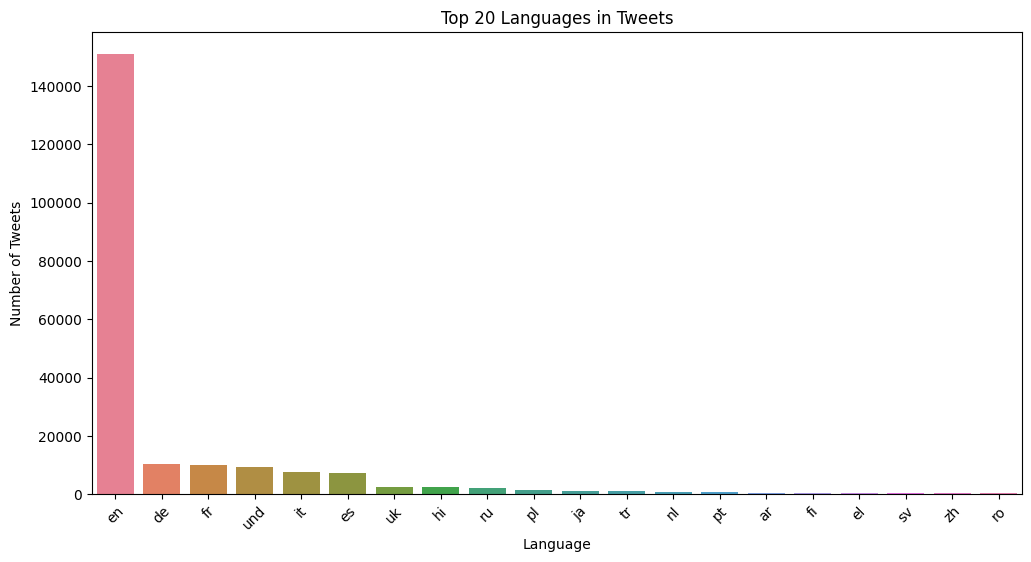

In [8]:
top_languages = df['language'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_languages.index, y=top_languages.values, hue=top_languages.index)
plt.title('Top 20 Languages in Tweets')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

### No. of Unique Tweets per Language

In [9]:
df.groupby('language').nunique()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts
language,,,,,,,,,,,,,,,,
am,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2
ar,260,260,231,199,264,315,387,260,548,546,59,350,343,0,10,548
bg,21,21,21,16,21,23,24,21,24,24,9,16,18,0,2,24
bn,28,28,28,15,27,44,67,28,73,73,2,71,71,0,8,73
ca,145,145,131,123,141,146,160,145,217,217,23,147,141,0,5,217
ckb,4,4,4,4,3,9,8,4,9,9,3,7,8,0,4,9
cs,202,202,176,151,186,193,222,202,233,231,57,108,110,0,11,233
cy,35,35,29,31,35,35,35,35,36,36,19,18,18,0,3,36
da,129,129,120,86,126,134,143,129,145,145,25,84,85,1,9,145


## Filtering English Tweets

In [10]:
df_en = df[df.language == 'en'].drop('language', axis=1)
df_en.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],NaN,0,2022-04-01 00:44:20.097867
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",NaN,0,2022-04-01 00:31:39.674382
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],NaN,0,2022-04-01 00:09:37.101459
6,1280648773346066432,SElsworth4,Anyone can do the right thing. You can never n...,Southernmost Southern CA,1343,549,67966,2020-07-07 23:44:15.000000,1509681952978210849,2022-04-01 00:00:00.000000,5,&amp;quot;How we were waiting for you!&amp;quo...,[],NaN,0,2022-04-01 00:31:39.666452
7,17673635,livemint,Breaking news and analyses of Indian and world...,India,70,2033266,394746,2008-11-27 09:07:38.000000,1509681953053843466,2022-04-01 00:00:00.000000,2,India's purchase of discounted #Russian crude ...,"[{'text': 'Russian', 'indices': [31, 39]}, {'t...",NaN,7,2022-04-01 00:44:20.089490


### Most Retweeted Tweet

In [11]:
sorted_tweets = df_en[['username', 'text','retweetcount','tweetid']].sort_values(by='retweetcount', ascending=False)
most_retweeted = sorted_tweets.iloc[0]
print(most_retweeted.text)

.@ZelenskyyUa's tv address to the Russian (!) people might be the most moving speech that I've ever seen in my entire life. The whole world needs to see, understand and share this crucial Ukrainian message.
#StandWithUkraine #Ukraine #Україна #Russia #Россия https://t.co/WoMOgqXTWX


### Top 10 most Retweeted Tweets

In [12]:
unique_tweets = sorted_tweets.drop_duplicates(subset=['text'])
unique_tweets.head(10)

,username,text,retweetcount,tweetid
35910,KathyBrownKathy,.@ZelenskyyUa's tv address to the Russian (!) ...,147055,1509734023001640960
102637,thamizhthesiyam,My daughter and I surviving the night in Ukrai...,107225,1509807000590630914
228953,InfinateRealms,"This, out of #Ukraine, is 100% one of the most...",104439,1509919689920552964
346919,epsunburst,"Little girl singing ""Let it go"" in a shelter\n...",77392,1510022916410429458
4616,SuzzannaTanner,JUST IN: #Russian state TV channels have been ...,61192,1509688252806041608
170508,cobby_jr1,The Anonymous collective is officially in cybe...,53285,1509870625309052932
178549,matthewwright34,"In #StPetersburg, #Russia, the police detained...",48730,1509877571793600515
363363,whomever_i,#Anonymous message to Vladimir Putin https://t...,46672,1510042478493249537
258847,greeningdeserts,If you're gonna listen to any speech about #Uk...,44388,1509945614053916674
291431,PoojashriMishra,Thank you @RussiaUN for your letter dated Marc...,35035,1509973815102746629


### Top 20 Locations based on No. of Tweets

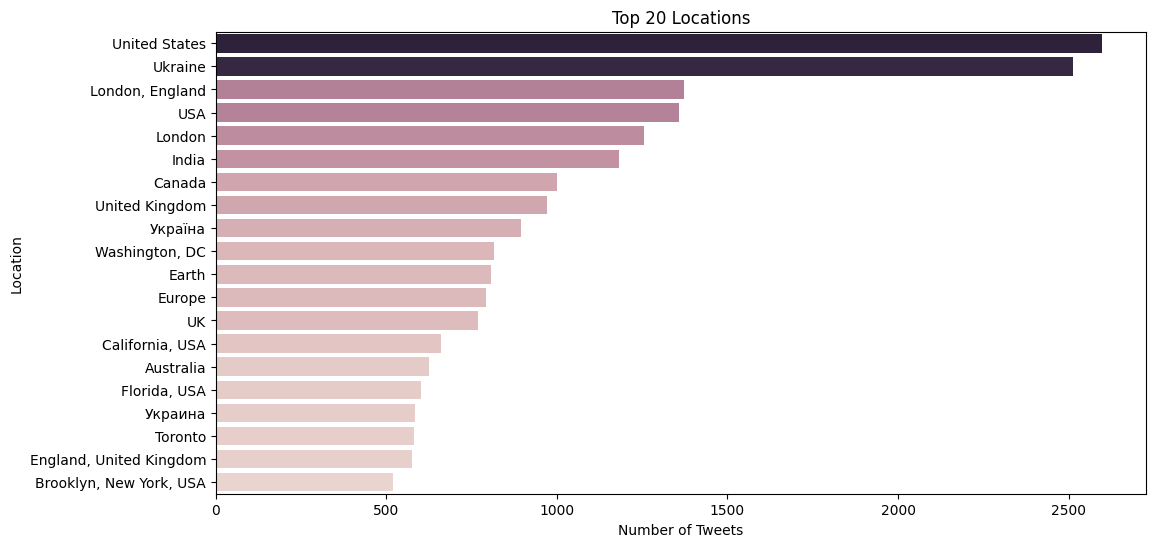

In [13]:
top_locations = df_en['location'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, hue=top_locations.values, orient='h', legend=False)
plt.title('Top 20 Locations')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.show()

### Including Time as a Feature

In [14]:
time_cols = ['extractedts','tweetcreatedts','usercreatedts']
df_en[time_cols[2]] = pd.to_datetime(df_en[time_cols[2]])
df_en.head(10)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],NaN,0,2022-04-01 00:44:20.097867
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",NaN,0,2022-04-01 00:31:39.674382
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],NaN,0,2022-04-01 00:09:37.101459
6,1280648773346066432,SElsworth4,Anyone can do the right thing. You can never n...,Southernmost Southern CA,1343,549,67966,2020-07-07 23:44:15,1509681952978210849,2022-04-01 00:00:00.000000,5,&amp;quot;How we were waiting for you!&amp;quo...,[],NaN,0,2022-04-01 00:31:39.666452
7,17673635,livemint,Breaking news and analyses of Indian and world...,India,70,2033266,394746,2008-11-27 09:07:38,1509681953053843466,2022-04-01 00:00:00.000000,2,India's purchase of discounted #Russian crude ...,"[{'text': 'Russian', 'indices': [31, 39]}, {'t...",NaN,7,2022-04-01 00:44:20.089490
9,1275475606684172290,medyanews_,"Medya News offers news, stories, columns, rese...","Kurdistan, Worldwide",167,6102,6651,2020-06-23 17:07:56,1509681953418711050,2022-04-01 00:00:00.000000,0,"""The image that Russia acquired over the past ...","[{'text': 'Putin', 'indices': [69, 75]}, {'tex...",NaN,0,2022-04-01 00:44:20.080995
10,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,911972,313091,2009-02-28 08:31:32,1509681953418752008,2022-04-01 00:00:00.000000,5,#Russia’s President Vladimir #Putin says he ha...,"[{'text': 'Russia', 'indices': [0, 7]}, {'text...",NaN,9,2022-04-01 00:44:20.064103
11,1086730932667568128,QueerTestimony,"Church Leader. BA- MBI\nEarth Scientist. BS, M...","Ontario, Canada",470,261,7766,2019-01-19 21:03:39,1509681953636700160,2022-04-01 00:00:00.000000,0,Sad to read of the #RussianArmy invading of #C...,"[{'text': 'RussianArmy', 'indices': [19, 31]},...",NaN,0,2022-04-01 00:09:36.929425
14,152930351,AnonGhostt,Secret for Public,UK,7,5034,376523,2010-06-07 07:02:46,1509681954647543824,2022-04-01 00:00:01.000000,6438,The #Anonymous collective has sent 7.000.000 a...,"[{'text': 'Anonymous', 'indices': [21, 31]}]",NaN,0,2022-04-01 00:09:36.853049
19,1023285701872377856,ScoopusaM,Our mission is to provide a platform to discus...,"Philadelphia, PA",236,97,1466,2018-07-28 19:14:57,1509681957524979718,2022-04-01 00:00:01.000000,0,Read: https://t.co/kzxUuS6Z4d\n.\n.\n.\n.\n.\n...,"[{'text': 'Peace', 'indices': [40, 46]}, {'tex...",NaN,0,2022-04-01 00:44:20.030967


e:\Career\PG\DSSA_Sem3\NLP\Project\sentiment\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Career\PG\DSSA_Sem3\NLP\Project\sentiment\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Career\PG\DSSA_Sem3\NLP\Project\sentiment\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


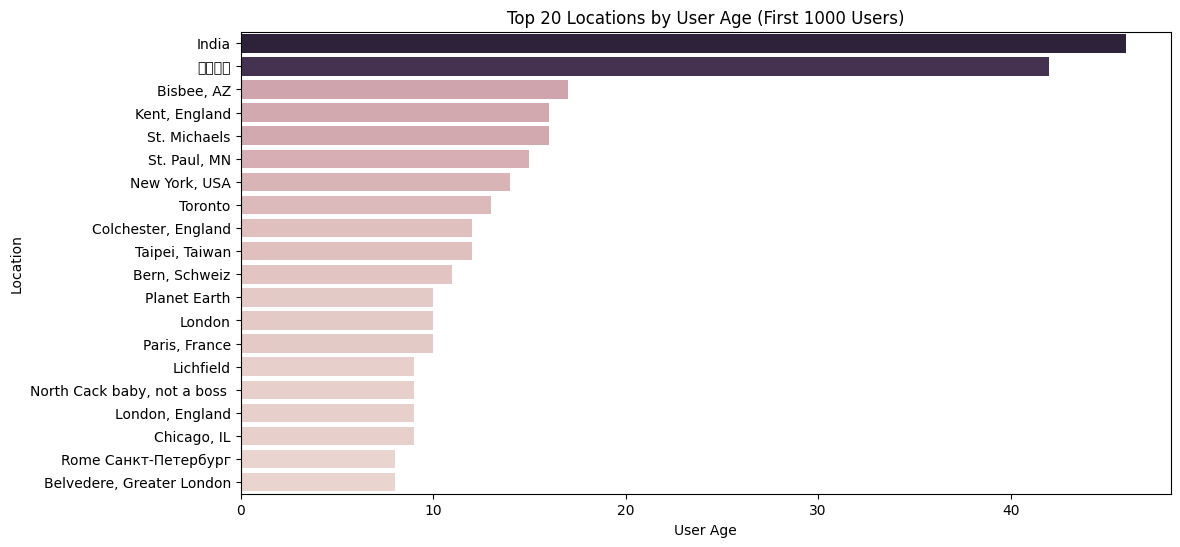

In [15]:
sort_by_userage= df_en.sort_values(by=time_cols[2], ascending=True)
columns = df_en.columns.to_list()

plt.figure(figsize=(12,6))
sns.barplot(x=sort_by_userage.iloc[:1000, columns.index('location')].value_counts()[:20],
            y=sort_by_userage.iloc[:1000, columns.index('location')].value_counts()[:20].index,
            hue=sort_by_userage.iloc[:1000, columns.index('location')].value_counts()[:20],
            orient='h', legend=False)

plt.title('Top 20 Locations by User Age (First 1000 Users)')
plt.xlabel('User Age')
plt.ylabel('Location')
plt.show()

### Analyzing Tweet Lengths

In [16]:
num_chars = df_en.text.apply(len)
num_words = df_en.text.apply(lambda x: len(x.split()))
df_en['num_chars'] = num_chars
df_en['num_words'] = num_words

print(f"Average no. of Characters: {int(num_chars.mean())}")
print(f"Average no. of Words : {int(num_words.mean())}")
print(f"Median no. of Characters: {int(num_chars.median())}")
print(f"Median no. of Words: {int(num_words.median())}")

Average no. of Characters: 211
Average no. of Words : 29
Median no. of Characters: 222
Median no. of Words: 30


In [17]:
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'], errors='coerce')
df['extractedts'] = pd.to_datetime(df['extractedts'], errors='coerce')

### Most common Hashtags

In [18]:
from unidecode import unidecode
from collections import Counter

def evaluate_hashtags(x):
    hashtags = []
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags

masterlist = []
hashtagsListCollection = df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist.append(hashtag)

topXItem = 25
x = Counter(masterlist)
topXItemList = x.most_common(topXItem)

In [19]:
df_hash = pd.DataFrame(topXItemList)
df_hash.columns = ['Hashtag','Tweets']
df_hash

,Hashtag,Tweets
0,ukraine,71278
1,russia,26793
2,standwithukraine,16128
3,putin,14541
4,kyiv,8385
5,russian,8249
6,mariupol,7990
7,ukrainerussiawar,6379
8,ukrainewar,5045
9,ukrainian,4651


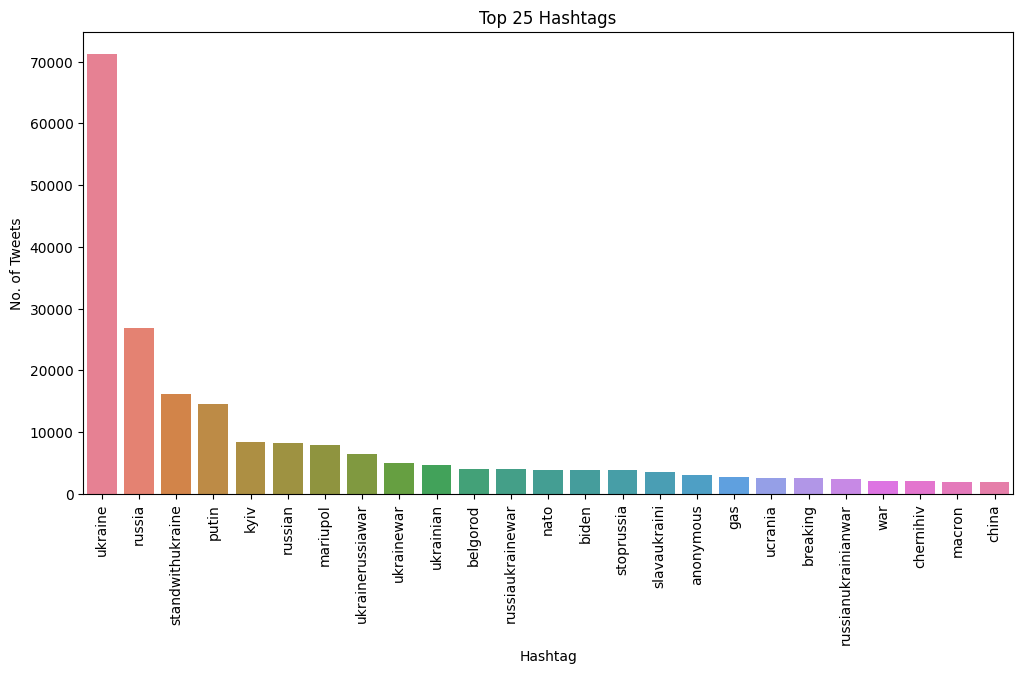

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_hash.Hashtag, y=df_hash.Tweets, hue=df_hash.Hashtag, legend=False)

plt.title('Top 25 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('No. of Tweets')
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis

In [21]:
sentiment_df = df[['tweetid', 'text', 'hashtags', 'language']] # Filtering Columns
sentiment_df = sentiment_df.loc[sentiment_df['language'] == 'en'].reset_index(drop=True)

sentiment_df['hashtags'] = sentiment_df.hashtags.map(lambda x: [i['text'] for i in eval(x)])

In [22]:
def preprocess(text):
    new_text = []
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
        
    return " ".join(new_text)

sentiment_df['text'] = sentiment_df['text'].apply(preprocess)

In [23]:
import torch
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", use_safetensors=True).to(DEVICE)

e:\Career\PG\DSSA_Sem3\NLP\Project\sentiment\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import urllib
import csv

labels = []
task = 'sentiment'
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"

with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [25]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
from scipy.special import softmax
from tqdm.auto import tqdm

BATCH_SIZE = 4

scores_all = np.empty((0, len(labels)))
text_all = sentiment_df['text'].to_list()
n = len(text_all)

with torch.no_grad():
    for start_idx in tqdm(range(0, n, BATCH_SIZE), desc="Analyzing Sentiment"):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(DEVICE)
        output = model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores

sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)
sentiment_df.to_csv("UkraineWarDataset/Tweets_Sentiment_Analysis_RoBERTa_Raw_Values.csv", index=False)

Analyzing Sentiment: 100%|██████████| 37741/37741 [30:00<00:00, 20.97it/s]


### Bag of Words

In [34]:
from textblob import TextBlob

def get_sentiment(tweet):
    sentiment = TextBlob(tweet).sentiment
    return sentiment.polarity, sentiment.subjectivity

sentiment_df['sentiment'] = sentiment_df['text'].apply(get_sentiment)

In [35]:
sentiment_df['polarity'] = sentiment_df['sentiment'].apply(lambda x:x[0])
sentiment_df['subjectivity'] = sentiment_df['sentiment'].apply(lambda x:x[1])
sentiment_df.drop('sentiment', axis=1, inplace=True)

sentiment_df.to_csv("UkraineWarDataset/Tweets_Sentiment_Analysis_BOW_Raw_Values.csv", index=False)

sentiment_df.head()

,tweetid,text,hashtags,language,negative,neutral,positive,polarity,subjectivity
0,1509681950042198030,⚡The Ukrainian Air Force would like to address...,[],en,0.294571,0.639323,0.066106,0.166667,0.166667
1,1509681951116046336,JUST IN: #Anonymous has hacked &amp; released ...,[Anonymous],en,0.478554,0.498005,0.023441,-0.065000,0.185000
2,1509681951304990720,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,0.004441,0.178883,0.816676,0.301894,0.355556
3,1509681952978210849,&amp;quot;How we were waiting for you!&amp;quo...,[],en,0.035087,0.348647,0.616266,0.000000,0.000000
4,1509681953053843466,India's purchase of discounted #Russian crude ...,"[Russian, Moscow]",en,0.177823,0.791826,0.030351,-0.233333,0.333333


## Analyzing the Sentiment of Tweets using RoBERTa

### EDA

In [149]:
tweet_df = pd.read_csv("UkraineWarDataset/Tweets_Sentiment_Analysis_RoBERTa_Raw_Values.csv", lineterminator='\n')
tweet_df.head()

,tweetid,text,hashtags,language,negative,neutral,positive\r
0,1509681950042198030,⚡The Ukrainian Air Force would like to address...,[],en,0.294571,0.639323,0.066106
1,1509681951116046336,JUST IN: #Anonymous has hacked &amp; released ...,['Anonymous'],en,0.478554,0.498005,0.023441
2,1509681951304990720,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,0.004441,0.178883,0.816676
3,1509681952978210849,&amp;quot;How we were waiting for you!&amp;quo...,[],en,0.035087,0.348647,0.616266
4,1509681953053843466,India's purchase of discounted #Russian crude ...,"['Russian', 'Moscow']",en,0.177823,0.791826,0.030351


In [150]:
tweet_df.rename(columns={'positive\r': 'positive'}, inplace=True)

In [151]:
conditions = [
    (tweet_df['negative'] > tweet_df['positive']) & (tweet_df['negative'] > tweet_df['neutral']),
    (tweet_df['positive'] > tweet_df['negative']) & (tweet_df['positive'] > tweet_df['neutral'])
]

tweet_df['sentiment'] = np.select(conditions, ['negative', 'positive'], default='neutral')

In [152]:
tweet_df.head()

,tweetid,text,hashtags,language,negative,neutral,positive,sentiment
0,1509681950042198030,⚡The Ukrainian Air Force would like to address...,[],en,0.294571,0.639323,0.066106,neutral
1,1509681951116046336,JUST IN: #Anonymous has hacked &amp; released ...,['Anonymous'],en,0.478554,0.498005,0.023441,neutral
2,1509681951304990720,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,0.004441,0.178883,0.816676,positive
3,1509681952978210849,&amp;quot;How we were waiting for you!&amp;quo...,[],en,0.035087,0.348647,0.616266,positive
4,1509681953053843466,India's purchase of discounted #Russian crude ...,"['Russian', 'Moscow']",en,0.177823,0.791826,0.030351,neutral


In [ ]:
tweet_df.drop(['language', 'negative', 'positive', 'neutral'], axis=1, inplace=True)
tweet_df.to_csv("UkraineWarDataset/Tweets_Sentiment_Analysis_RoBERTa.csv", index=False)

<Axes: xlabel='sentiment', ylabel='count'>

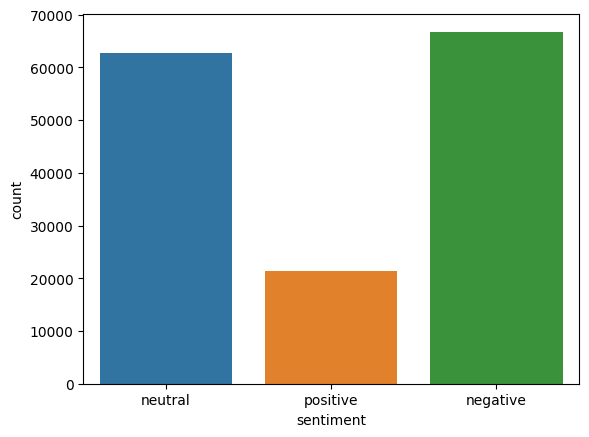

In [154]:
sns.countplot(x=tweet_df['sentiment'], data=tweet_df, hue=tweet_df['sentiment'])

In [155]:
tweet_neg = tweet_df.loc[tweet_df['sentiment'] == 'negative'].reset_index(drop=True)
tweet_net = tweet_df.loc[tweet_df['sentiment'] == 'neutral'].reset_index(drop=True)
tweet_pos = tweet_df.loc[tweet_df['sentiment'] == 'positive'].reset_index(drop=True)

### Word Clouds

#### 1. Negative Tweets Word Cloud

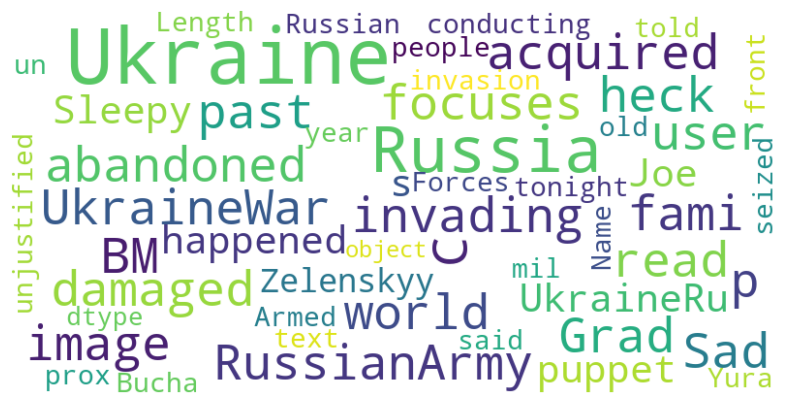

In [60]:
from wordcloud import WordCloud, STOPWORDS

stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_neg['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2. Positive Tweets Word Cloud

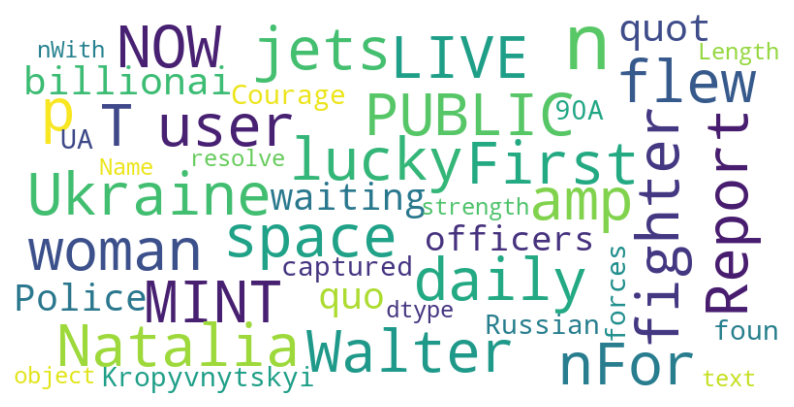

In [61]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_pos['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Classification using ML models

In [156]:
dataset = tweet_df[['sentiment','text']]
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [157]:
from nltk.corpus import stopwords

emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = set(stopwords.words('english'))

In [158]:
from nltk.stem import WordNetLemmatizer
import re

def preprocess(textdata):
    processedText = []
    
    wordLemm = WordNetLemmatizer()
    
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

processedtext = preprocess(text)

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size=0.05, random_state=42)
print(f'Data Split done.')

Data Split done.


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print(f'Data Transformed.')

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f'SMOTE applied. Resampled training data size: {len(y_train)}')

Vectoriser fitted.
Data Transformed.
SMOTE applied. Resampled training data size: 190299


#### Comparative Analysis

--- Training Bernoulli Naive Bayes ---
Model fitted.
Predictions complete.

Classification Report for Bernoulli Naive Bayes:

              precision    recall  f1-score   support

    negative       0.95      0.92      0.93      3355
     neutral       0.91      0.92      0.91      3149
    positive       0.88      0.93      0.90      1045

    accuracy                           0.92      7549
   macro avg       0.91      0.92      0.92      7549
weighted avg       0.92      0.92      0.92      7549

Accuracy Score: 0.9205
ROC AUC Score (One-vs-Rest): 0.9883

--- Training K-Nearest Neighbors ---
Model fitted.
Predictions complete.

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

    negative       0.99      0.74      0.85      3355
     neutral       0.95      0.78      0.86      3149
    positive       0.42      0.99      0.59      1045

    accuracy                           0.79      7549
   macro avg       0.79      0.84      

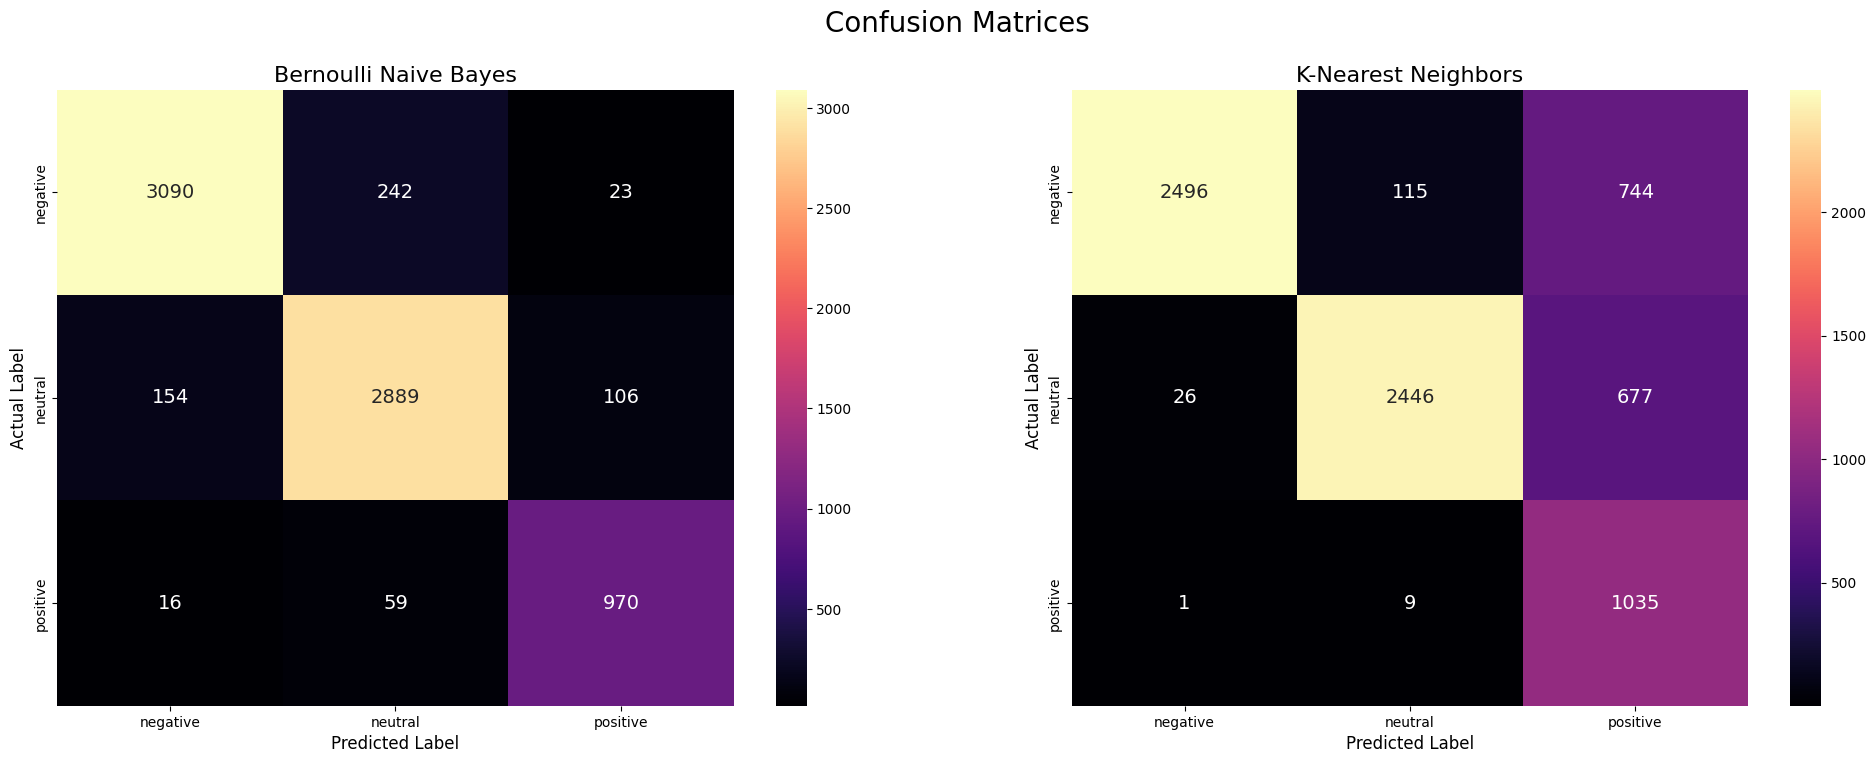

In [161]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

models = {
    "Bernoulli Naive Bayes": BernoulliNB(alpha=2),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

comparison_scores = {
    "Model": [],
    "Accuracy": [],
    "ROC_AUC": []
}

fig, axes = plt.subplots(1, 2, figsize=(24,8))
fig.suptitle('Confusion Matrices', fontsize=20)

for i, (model_name, model) in enumerate(models.items()):
    print(f"--- Training {model_name} ---")
    model.fit(X_train, y_train)
    print("Model fitted.")

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print("Predictions complete.")

    print(f"\nClassification Report for {model_name}:\n")
    print(metrics.classification_report(y_test, y_pred))

    accuracy = metrics.accuracy_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_proba, 
                                    multi_class='ovr', 
                                    labels=model.classes_)

    comparison_scores["Model"].append(model_name)
    comparison_scores["Accuracy"].append(accuracy)
    comparison_scores["ROC_AUC"].append(roc_auc)
    
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"ROC AUC Score (One-vs-Rest): {roc_auc:.4f}\n")

    cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    ax = axes[i] 
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
                xticklabels=model.classes_, 
                yticklabels=model.classes_,
                ax=ax,
                annot_kws={"size": 14})
    
    ax.set_title(f'{model_name}', fontsize=16)
    ax.set_ylabel('Actual Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

plt.show()


Final Scores:
                   Model  Accuracy   ROC_AUC
0  Bernoulli Naive Bayes  0.920519  0.988284
1    K-Nearest Neighbors  0.791760  0.939444


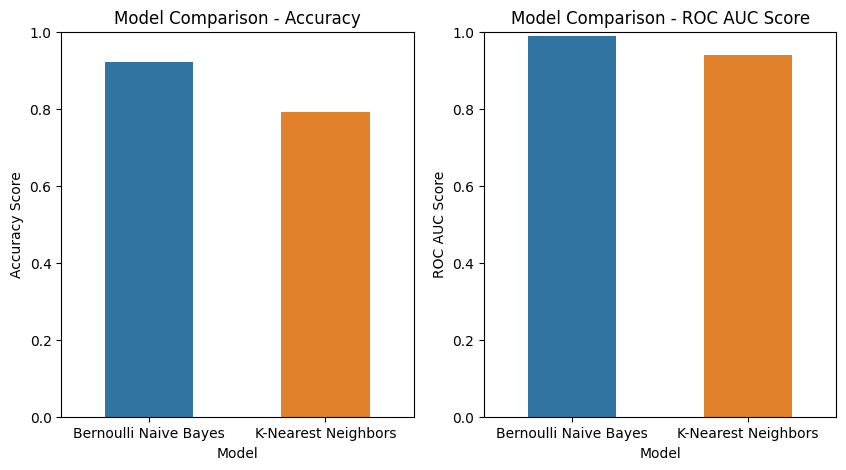

In [162]:
df_scores = pd.DataFrame(comparison_scores)
print("\nFinal Scores:")
print(df_scores)

plt.figure(figsize=(10,5))

# Plot 1: Accuracy Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df_scores, hue='Model', width=0.5)
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.xlabel('Model')

# Plot 2: ROC AUC Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='ROC_AUC', data=df_scores, hue='Model', width=0.5)
plt.title('Model Comparison - ROC AUC Score')
plt.ylim(0, 1)
plt.ylabel('ROC AUC Score')
plt.xlabel('Model')

plt.show()

## Analyzing the Sentiment of Tweets using VADER

In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\upaya\AppData\Roaming\nltk_data...


True

In [54]:
df = pd.read_csv("UkraineWarDataset\Tweets_Sentiment_Analysis_RoBERTa_Raw_Values.csv")
df.head()

,tweetid,text,hashtags,language,negative,neutral,positive
0,1509681950042198030,⚡The Ukrainian Air Force would like to address...,[],en,0.294571,0.639323,0.066106
1,1509681951116046336,JUST IN: #Anonymous has hacked &amp; released ...,['Anonymous'],en,0.478554,0.498005,0.023441
2,1509681951304990720,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,0.004441,0.178883,0.816676
3,1509681952978210849,&amp;quot;How we were waiting for you!&amp;quo...,[],en,0.035087,0.348647,0.616266
4,1509681953053843466,India's purchase of discounted #Russian crude ...,"['Russian', 'Moscow']",en,0.177823,0.791826,0.030351


In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df.drop(columns=['language', 'negative', 'positive', 'neutral'], inplace=True)

sia = SentimentIntensityAnalyzer()
df['vader_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['vader_sentiment_score'].apply(get_sentiment)
df.head()

,tweetid,text,hashtags,vader_sentiment_score,sentiment
0,1509681950042198030,⚡The Ukrainian Air Force would like to address...,[],0.4404,Positive
1,1509681951116046336,JUST IN: #Anonymous has hacked &amp; released ...,['Anonymous'],-0.4019,Negative
2,1509681951304990720,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],0.8829,Positive
3,1509681952978210849,&amp;quot;How we were waiting for you!&amp;quo...,[],0.5411,Positive
4,1509681953053843466,India's purchase of discounted #Russian crude ...,"['Russian', 'Moscow']",-0.5423,Negative


### Sentiment Distribution

<Axes: xlabel='sentiment', ylabel='count'>

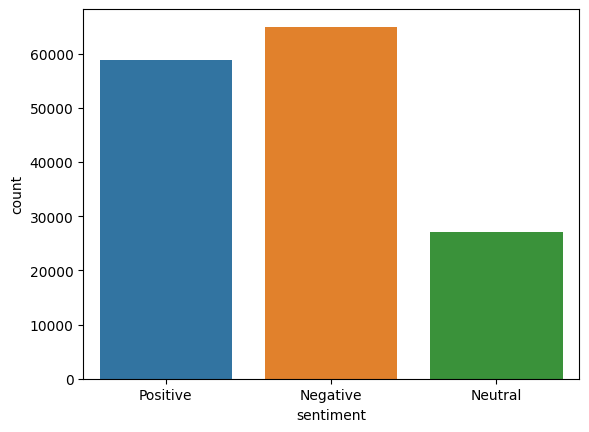

In [56]:
sns.countplot(x=df['sentiment'], data=df, hue=df['sentiment'])

#### Most Positive and Negative Tweets

In [57]:
most_positive = df.loc[df['vader_sentiment_score'].idxmax()]
most_negative = df.loc[df['vader_sentiment_score'].idxmin()]

print("Most Positive Tweet:")
print(most_positive['text'], "\nScore:", most_positive['vader_sentiment_score'])
print("\nMost Negative Tweet:")
print(most_negative['text'], "\nScore:", most_negative['vader_sentiment_score'])

Most Positive Tweet:
@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Now, that's a smack down I can totally get behind! 😂🤣🤣🤣

Good morning and Happy Friday, Sweet Lola! I hope you're feeling better! Love you, my dear friend!! Peace and love to all, Putin and other like minded authoritarians, notwithstanding!! 🥰❤️💙💛🇺🇦 #StandWithUkraine http 
Score: 0.9893

Most Negative Tweet:
@user You say #Russia's entry into #Ukraine's civil war was "brutal &amp; illegal", but you ignore the fact that #Ukraine's #US-backed coup was illegal &amp; #Ukraine's #nazi-dominated coup govt has oppressed their people &amp; waged a war since 2014, killing 10,000+ people who rejected the coup. http 
Score: -0.9884


In [58]:
tweet_neg = df.loc[df['sentiment'] == 'Negative'].reset_index(drop=True)
tweet_neu = df.loc[df['sentiment'] == 'Neutral'].reset_index(drop=True)
tweet_pos = df.loc[df['sentiment'] == 'Positive'].reset_index(drop=True)

### Word Clouds

#### 1. Negative Tweets Word Cloud

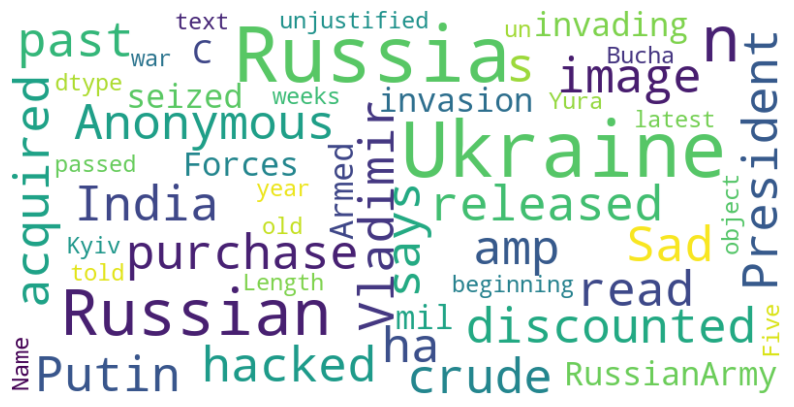

In [59]:
from wordcloud import WordCloud, STOPWORDS

stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_neg['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2. Positive Tweets Word Cloud

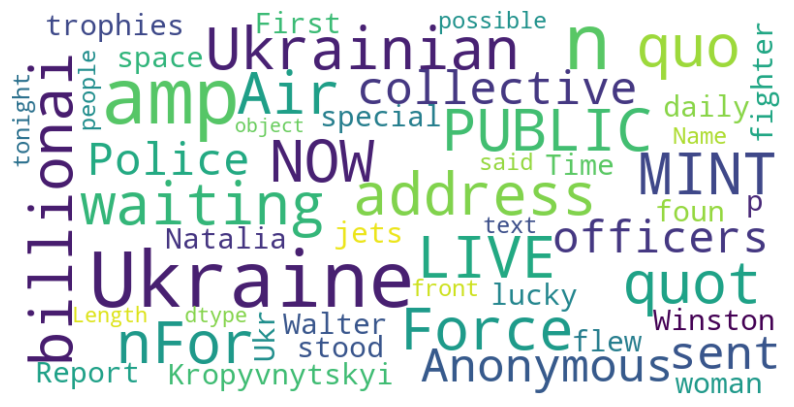

In [60]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_pos['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Comparison: VADER vs RoBERTa Sentiment Analysis

In [61]:
roberta_df = pd.read_csv("UkraineWarDataset\Tweets_Sentiment_Analysis_RoBERTa.csv")
roberta_df['sentiment'] = roberta_df['sentiment'].apply(lambda x: x.capitalize())

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(roberta_df['sentiment'], df['sentiment'])
print("Similarity of Predictions:", round(accuracy*100, 2), "%")
print("\nClassification Report:\n", classification_report(roberta_df['sentiment'], df['sentiment']))

Similarity of Predictions: 57.2 %

Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.73      0.74     66788
     Neutral       0.70      0.30      0.42     62695
    Positive       0.32      0.88      0.47     21480

    accuracy                           0.57    150963
   macro avg       0.59      0.64      0.54    150963
weighted avg       0.67      0.57      0.57    150963



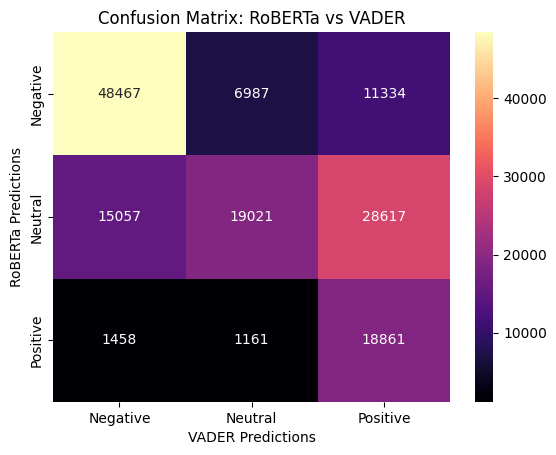

In [62]:
cm = confusion_matrix(roberta_df['sentiment'], df['sentiment'])
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix: RoBERTa vs VADER')
plt.xlabel('VADER Predictions')
plt.ylabel('RoBERTa Predictions')
plt.show()

<Figure size 1200x600 with 0 Axes>

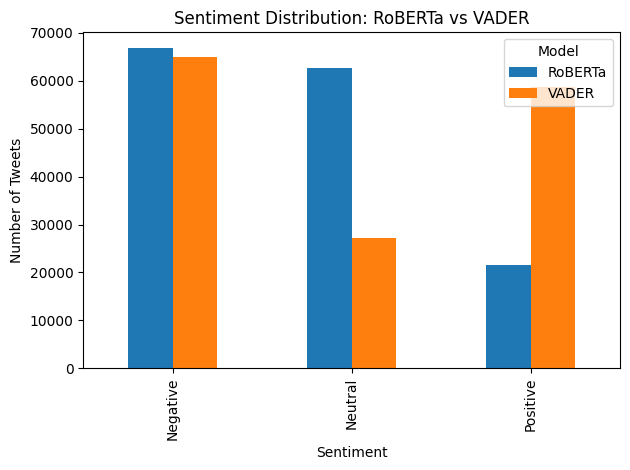

In [64]:
df_combined = pd.DataFrame({
    'RoBERTa': roberta_df['sentiment'].value_counts(),
    'VADER': df['sentiment'].value_counts()
})

plt.figure(figsize=(12,6))
df_combined.plot(kind='bar')
plt.title('Sentiment Distribution: RoBERTa vs VADER')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Emotion Analysis

In [37]:
emotion_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
emotion_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion", use_safetensors=True).to(DEVICE)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [40]:
labels = []
task = 'emotion'
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"

with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [41]:
BATCH_SIZE = 4

scores_all = np.empty((0, len(labels)))
text_all = sentiment_df['text'].to_list()
n = len(text_all)

with torch.no_grad():
    for start_idx in tqdm(range(0, n, BATCH_SIZE), desc="Analyzing Emotion"):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(DEVICE)
        output = emotion_model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()

sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)
sentiment_df.to_csv("UkraineWarDataset/Tweets_Emotion_Analysis_RoBERTa_Raw_Values.csv", index=False)

Analyzing Emotion: 100%|██████████| 37741/37741 [30:44<00:00, 20.47it/s]


## Analyzing the Emotion of Tweets

### EDA

In [114]:
tweet_df2 = pd.read_csv("UkraineWarDataset/Tweets_Emotion_Analysis_RoBERTa_Raw_Values.csv", lineterminator='\n')
tweet_df2.head()

,tweetid,text,hashtags,language,negative,neutral,positive,polarity,subjectivity,anger,joy,optimism,sadness\r
0,1509681950042198030,⚡The Ukrainian Air Force would like to address...,[],en,0.294571,0.639323,0.066106,0.166667,0.166667,0.427224,0.032417,0.407234,0.133126
1,1509681951116046336,JUST IN: #Anonymous has hacked &amp; released ...,['Anonymous'],en,0.478554,0.498005,0.023441,-0.065000,0.185000,0.646156,0.041218,0.056507,0.256119
2,1509681951304990720,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,0.004441,0.178883,0.816676,0.301894,0.355556,0.042462,0.788931,0.138781,0.029825
3,1509681952978210849,&amp;quot;How we were waiting for you!&amp;quo...,[],en,0.035087,0.348647,0.616266,0.000000,0.000000,0.042224,0.899494,0.041635,0.016647
4,1509681953053843466,India's purchase of discounted #Russian crude ...,"['Russian', 'Moscow']",en,0.177823,0.791826,0.030351,-0.233333,0.333333,0.417105,0.137930,0.200716,0.244249


In [115]:
tweet_df2.rename(columns={'sadness\r': 'sadness'}, inplace=True)

In [116]:
conditions = [
    (tweet_df2['anger'] > tweet_df2['joy']) & (tweet_df2['anger'] > tweet_df2['optimism']) & (tweet_df2['anger'] > tweet_df2['sadness']),
    (tweet_df2['joy'] > tweet_df2['anger']) & (tweet_df2['joy'] > tweet_df2['optimism']) & (tweet_df2['joy'] > tweet_df2['sadness']),
    (tweet_df2['optimism'] > tweet_df2['anger']) & (tweet_df2['optimism'] > tweet_df2['joy']) & (tweet_df2['optimism'] > tweet_df2['sadness'])
]

tweet_df2['emotion'] = np.select(conditions, ['anger', 'joy', 'optimism'], default='sadness')

In [117]:
tweet_df2.head()

,tweetid,text,hashtags,language,negative,neutral,positive,polarity,subjectivity,anger,joy,optimism,sadness,emotion
0,1509681950042198030,⚡The Ukrainian Air Force would like to address...,[],en,0.294571,0.639323,0.066106,0.166667,0.166667,0.427224,0.032417,0.407234,0.133126,anger
1,1509681951116046336,JUST IN: #Anonymous has hacked &amp; released ...,['Anonymous'],en,0.478554,0.498005,0.023441,-0.065000,0.185000,0.646156,0.041218,0.056507,0.256119,anger
2,1509681951304990720,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,0.004441,0.178883,0.816676,0.301894,0.355556,0.042462,0.788931,0.138781,0.029825,joy
3,1509681952978210849,&amp;quot;How we were waiting for you!&amp;quo...,[],en,0.035087,0.348647,0.616266,0.000000,0.000000,0.042224,0.899494,0.041635,0.016647,joy
4,1509681953053843466,India's purchase of discounted #Russian crude ...,"['Russian', 'Moscow']",en,0.177823,0.791826,0.030351,-0.233333,0.333333,0.417105,0.137930,0.200716,0.244249,anger


In [118]:
tweet_df2 = tweet_df2[['tweetid', 'text', 'hashtags', 'emotion']]
tweet_df2.to_csv("UkraineWarDataset/Tweets_Emotion_Analysis_RoBERTa.csv", index=False)

<Axes: xlabel='emotion', ylabel='count'>

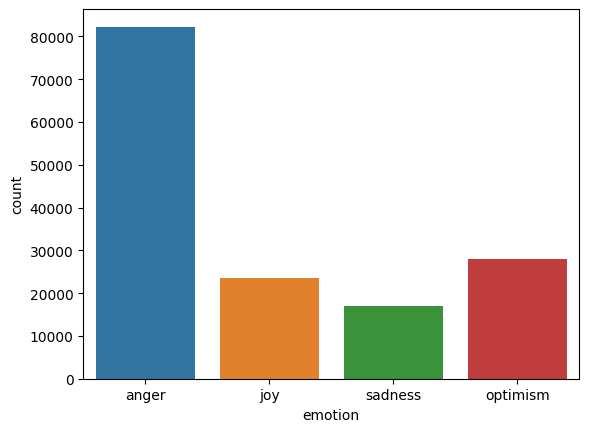

In [123]:
sns.countplot(x=tweet_df2['emotion'], data=tweet_df2, hue=tweet_df2['emotion'])

In [126]:
tweet_ang = tweet_df2.loc[tweet_df2['emotion'] == 'anger'].reset_index(drop=True)
tweet_joy = tweet_df2.loc[tweet_df2['emotion'] == 'joy'].reset_index(drop=True)
tweet_sad = tweet_df2.loc[tweet_df2['emotion'] == 'sadness'].reset_index(drop=True)
tweet_opt = tweet_df2.loc[tweet_df2['emotion'] == 'optimism'].reset_index(drop=True)

### Word Clouds

#### 1. Angry Tweets Word Cloud

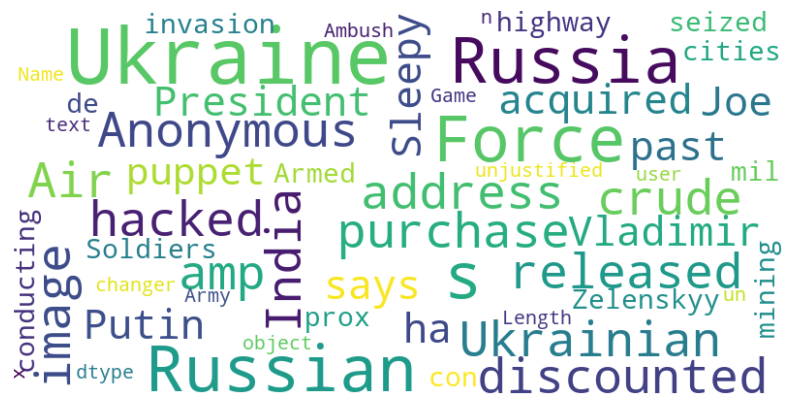

In [127]:
from wordcloud import WordCloud, STOPWORDS

stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_ang['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2. Joyous Tweets Word Cloud

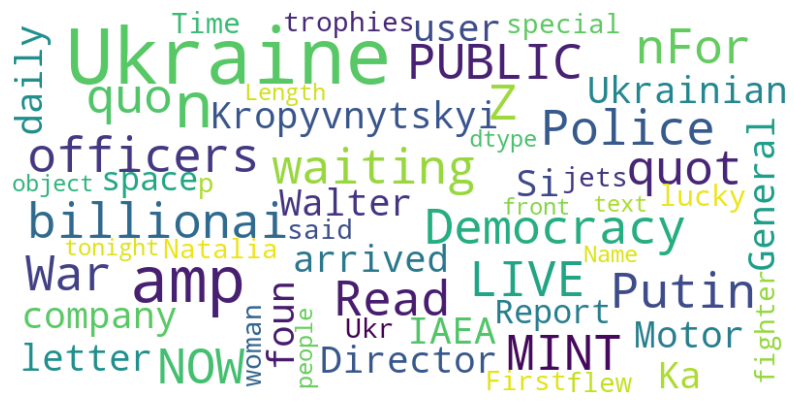

In [128]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_joy['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 3. Sad Tweets Word Cloud

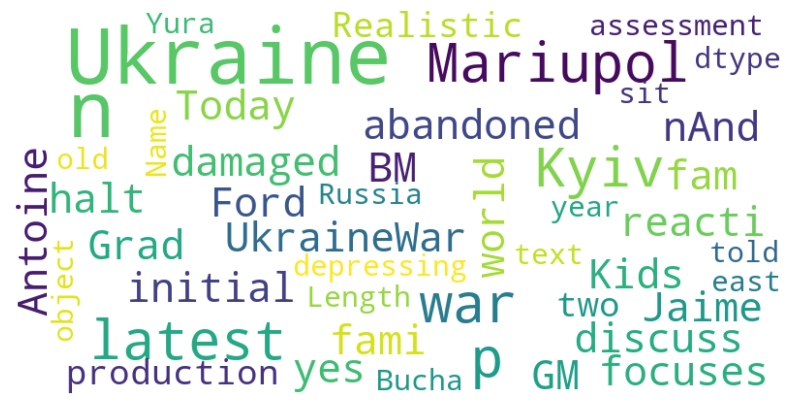

In [130]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_sad['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 4. Optimistic Tweets Word Cloud

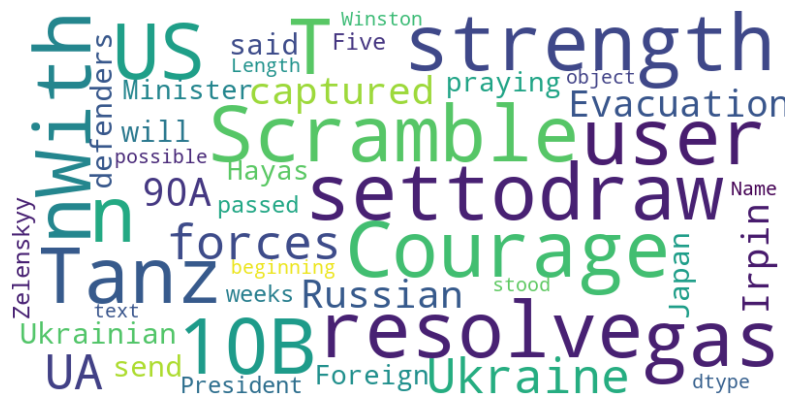

In [131]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(str(tweet_opt['text']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Classification using ML models

In [140]:
dataset = tweet_df2[['emotion','text']]
text, emotion = list(dataset['text']), list(dataset['emotion'])

In [141]:
from nltk.corpus import stopwords

emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = set(stopwords.words('english'))

In [142]:
from nltk.stem import WordNetLemmatizer
import re

def preprocess(textdata):
    processedText = []
    
    wordLemm = WordNetLemmatizer()
    
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

processedtext = preprocess(text)

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processedtext, emotion, test_size=0.05, random_state=42)
print(f'Data Split done.')

Data Split done.


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print(f'Data Transformed.')

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f'SMOTE applied. Resampled training data size: {len(y_train)}')

Vectoriser fitted.
Data Transformed.
SMOTE applied. Resampled training data size: 312600


#### Comparative Analysis

--- Training Bernoulli Naive Bayes ---
Model fitted.
Predictions complete.

Classification Report for Bernoulli Naive Bayes:

              precision    recall  f1-score   support

       anger       0.96      0.94      0.95      4118
         joy       0.84      0.91      0.88      1165
    optimism       0.88      0.90      0.89      1403
     sadness       0.90      0.86      0.88       863

    accuracy                           0.92      7549
   macro avg       0.89      0.90      0.90      7549
weighted avg       0.92      0.92      0.92      7549

Accuracy Score: 0.9164
ROC AUC Score (One-vs-Rest): 0.9886

--- Training K-Nearest Neighbors ---
Model fitted.
Predictions complete.

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

       anger       1.00      0.75      0.86      4118
         joy       0.68      0.93      0.79      1165
    optimism       0.79      0.91      0.84      1403
     sadness       0.64      0.92      0

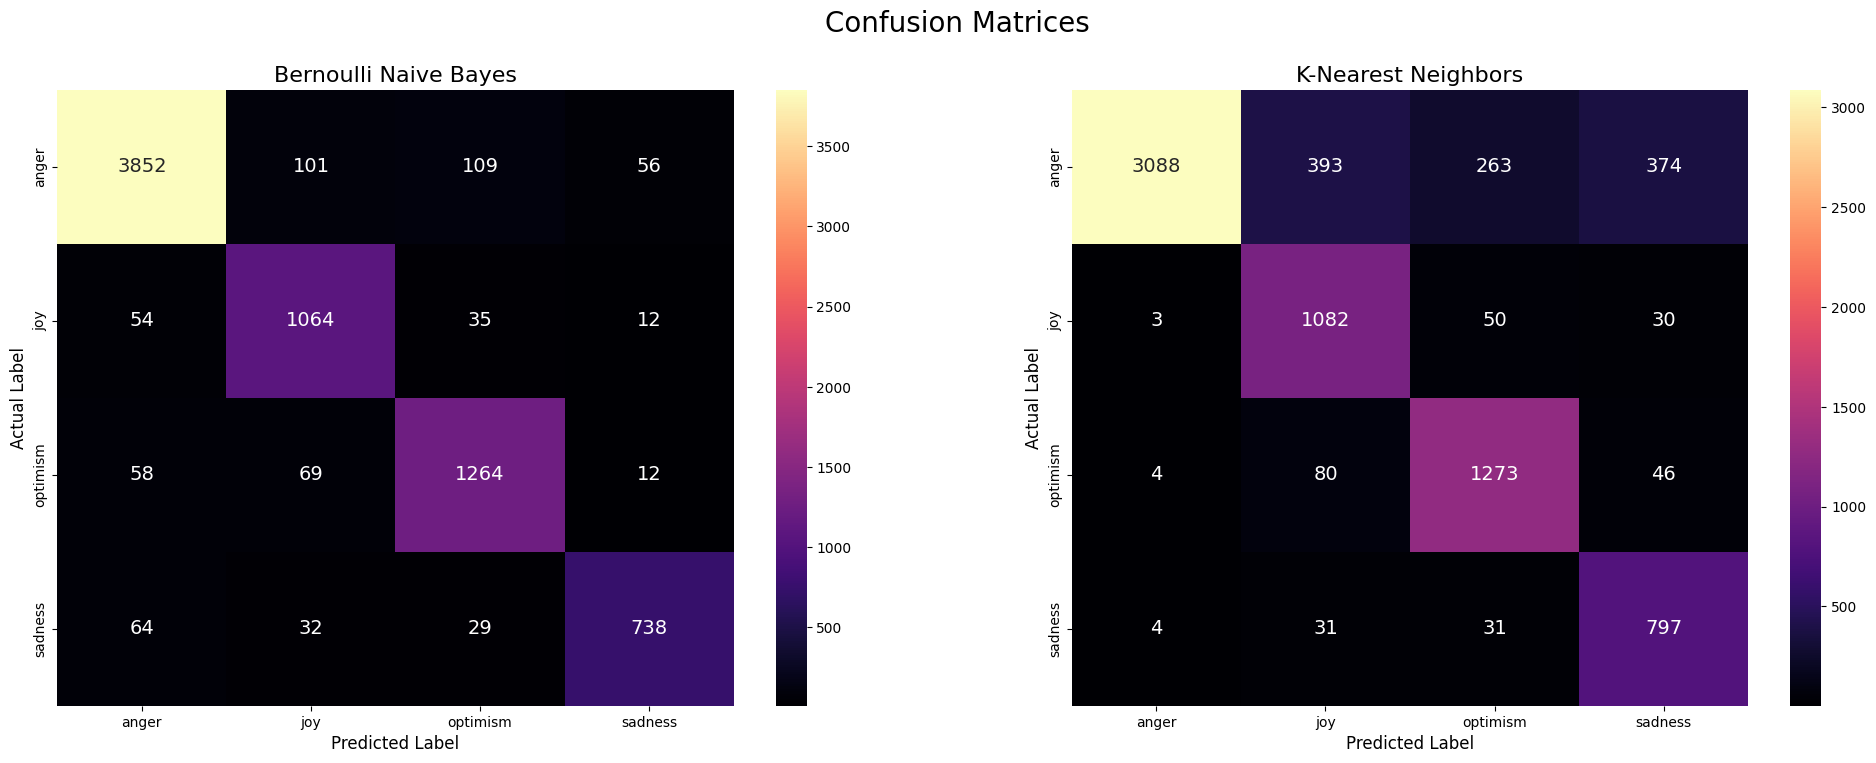

In [146]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

models = {
    "Bernoulli Naive Bayes": BernoulliNB(alpha=2),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

comparison_scores = {
    "Model": [],
    "Accuracy": [],
    "ROC_AUC": []
}

fig, axes = plt.subplots(1, 2, figsize=(24,8))
fig.suptitle('Confusion Matrices', fontsize=20)

for i, (model_name, model) in enumerate(models.items()):
    print(f"--- Training {model_name} ---")
    model.fit(X_train, y_train)
    print("Model fitted.")

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print("Predictions complete.")

    print(f"\nClassification Report for {model_name}:\n")
    print(metrics.classification_report(y_test, y_pred))

    accuracy = metrics.accuracy_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_proba, 
                                    multi_class='ovr', 
                                    labels=model.classes_)

    comparison_scores["Model"].append(model_name)
    comparison_scores["Accuracy"].append(accuracy)
    comparison_scores["ROC_AUC"].append(roc_auc)
    
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"ROC AUC Score (One-vs-Rest): {roc_auc:.4f}\n")

    cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    ax = axes[i] 
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
                xticklabels=model.classes_, 
                yticklabels=model.classes_,
                ax=ax,
                annot_kws={"size": 14})
    
    ax.set_title(f'{model_name}', fontsize=16)
    ax.set_ylabel('Actual Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

plt.show()


Final Scores:
                   Model  Accuracy   ROC_AUC
0  Bernoulli Naive Bayes  0.916413  0.988617
1    K-Nearest Neighbors  0.826600  0.955160


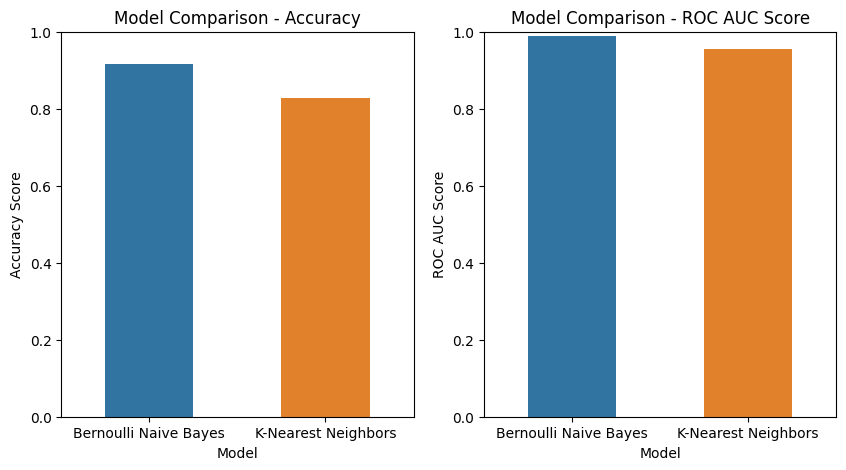

In [148]:
df_scores2 = pd.DataFrame(comparison_scores)
print("\nFinal Scores:")
print(df_scores2)

plt.figure(figsize=(10,5))

# Plot 1: Accuracy Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df_scores2, hue='Model', width=0.5)
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.xlabel('Model')

# Plot 2: ROC AUC Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='ROC_AUC', data=df_scores2, hue='Model', width=0.5)
plt.title('Model Comparison - ROC AUC Score')
plt.ylim(0, 1)
plt.ylabel('ROC AUC Score')
plt.xlabel('Model')

plt.show()